   #                                <h1><center>Digital Signal Processing tutorials</center></h1>


<img src="https://cdn.eeweb.com/articles/quizzes/AudioProcessing-1447060160.jpg">






## Table of Contents

<ul>
<li><a href="#intro">Introduction to Digital Signal Processing</a></li>
<li><a href="#quantization">Quantization and The Sampling Theorem</a></li>
<li><a href="#lss">Linear Systems and Superposition</a></li>
<li><a href="#convolution">Convolution</a></li>
<li><a href="#ft">Fourier Transform</a></li> 
<li><a href="#complex">Complex Numbers</a></li>
<li><a href="#cft">Complex Fourier Transform</a></li>    
<li><a href="#fft">Fast Fourier Transform</a></li>
<li><a href="#dfd">Digital Filter Design</a></li>
<li><a href="#fir">Finite and Infinite Impulse Response filters</a></li>
<li><a href="#wf">Filters: Windowed, Custom and Match</a></li>
<li><a href="#fftconvolution">FFT Convolution</a></li>
<li><a href="#lti">Linear time Invariant systems</a></li>
<li><a href="#interp">Interpolation</a></li>
<li><a href="#wg">Waveform Generation</a></li>    
</ul>

### *Note**:
* Given self-study notes are written in Jupyter Notebook environment
* All the codes are implemented in Python
* All provided materials are gathered based on multiple resources 

<a id='intro'></a>
# I. Introduction to Digital Signal Processing (DSP)
- 1) What is Digital Signal Processing?
- 2) Simple signal generations 



<h1 style="color:black;font-size:20px;"> 1.1 What is Digital Signal Processing?</h1>

**Digital signal processing (DSP)** is the process of analyzing and modifying a signal to optimize or improve its efficiency or performance. It involves applying various mathematical and computational algorithms to analog and digital signals to produce a signal that's of higher quality than the original signal.


<img src="https://www.allaboutcircuits.com/uploads/articles/An-Introduction-to-Digital-Signal-Processing-(3).png" width="800">

<h1 style="color:black;font-size:20px;"> 2.2 Simple Signal generations</h1>


**Important python libraries for DSP analysis**

- numpy
- matplotlib
- pandas
- sicpy

**Links and References**:
- [Digital Signal Processing online book](https://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/index.html)
- [DSP book(pdf)](https://users.dimi.uniud.it/~antonio.dangelo/MMS/materials/Guide_to_Digital_Signal_Process.pdf) 
- [Basics of DSP](http://www.hep.upatras.gr/class/download/psi_epe_sim/1_Basics_DSP_AV_Intro.pdf)
- [SP (YouTube)](https://www.youtube.com/watch?v=w9Se072wt_8&list=PLJ-OcUCIty7evBmHvYRv66RcuziszpSFB&index=2)
- [Signals and systems(Youtube)](https://www.youtube.com/watch?v=s8rsR_TStaA&list=PLBlnK6fEyqRhG6s3jYIU48CqsT5cyiDTO)

### Coding for Signal generation 

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
from scipy.io.wavfile import write
import sounddevice as sd
%matplotlib inline

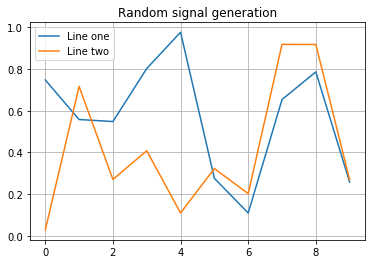

In [2]:
# generating random signals 
x = np.random.rand(10)
y = np.random.rand(10)

# plot the signal
plt.plot(x, label = 'Line one')
plt.plot(y, label = 'Line two')
plt.legend()
plt.grid(True)
plt.title('Random signal generation');

#### Audio file generation with random numbers

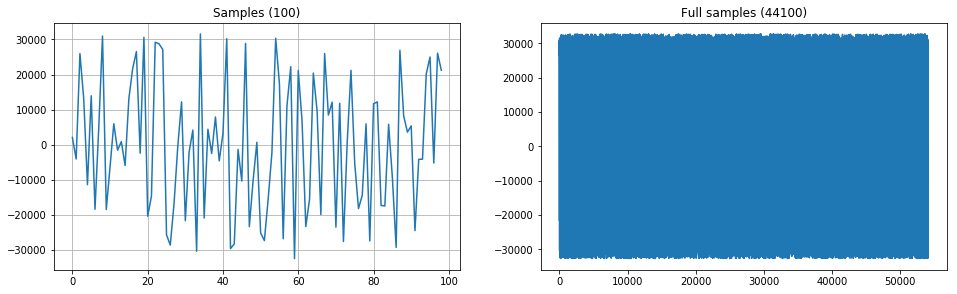

In [3]:
data = np.random.uniform(-1,1,54100) # 44100 random samples between -1 and 1
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
write('Random.wav', 44100, scaled)

f = plt.figure(figsize=(16,10))

ax1 = f.add_subplot(221) 

#plt.figure(figsize=(8,6))
ax1.plot(scaled[1:100])
ax1.set_title('Samples (100)')
ax1.grid(True)
ax2 = f.add_subplot(222)
ax2.set_title('Full samples (44100)')
ax2.plot(scaled)
#ax2.title('Full samples')
f.subplots_adjust(wspace=0.2)

#### Play the generated sound without saving

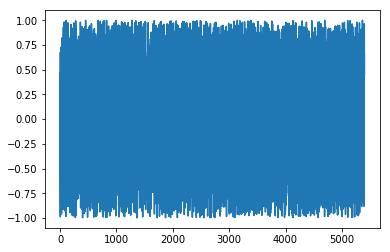

In [4]:
# 
fs = 5400
data = np.random.uniform(-1, 1, fs)

plt.plot(data)
# play here without saving it
sd.play(data, fs)

#### Sin wave sound generation

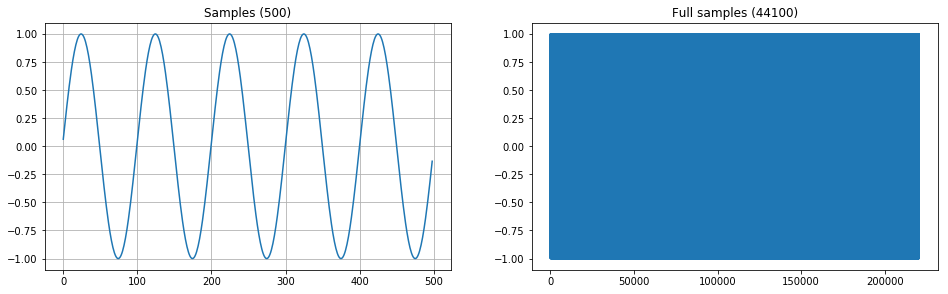

In [5]:
import numpy as np
from scipy.io import wavfile

# generate sample sound
# parameters implementation
sampleRate = 44100 
frequency = 440
length = 5

t = np.linspace(0, length, sampleRate * length)  #  Produces a 5 second Audio-File
y = np.sin(frequency * 2 * np.pi * t)  #  Has frequency of 440Hz

wavfile.write('Sine.wav', sampleRate, y)

f = plt.figure(figsize=(16,10))

ax1 = f.add_subplot(221) 
ax1.plot(y[1:500])
ax1.set_title('Samples (500)')
ax1.grid(True)
ax2 = f.add_subplot(222)
ax2.set_title('Full samples (44100)')
ax2.plot(y)
f.subplots_adjust(wspace=0.2)


<a id='quantization'></a>
<h1 style="color:black;font-size:28px;"> II.Quantization and Sampling theorem</h1>


## 2.1 Quantization

<font size = '3'>**Quantization** is the process of mapping a continuous amplitude to a countable set of amplitude values. This refers also to the *requantization* of a signal from a large set of countable amplitude values to a smaller set. Scalar quantization is an instantaneous and memoryless operation. It can be applied to the continuous amplitude signal, also referred to as **analog signal** or to the (time-)discrete signal. The quantized discrete signal is termed as **digital signal**. The connections between the different domains is illustrated in the following for time dependent signals.</font>

<img src="https://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/_images/analog_discrete_digital.png" width='600' align='left'>

##### Links for Quantization:
- [Theory](https://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/quantization/introduction.html)
- [Video(Youtube)](https://www.youtube.com/watch?v=FPB27nzeM-g)

### Coding for Quantization

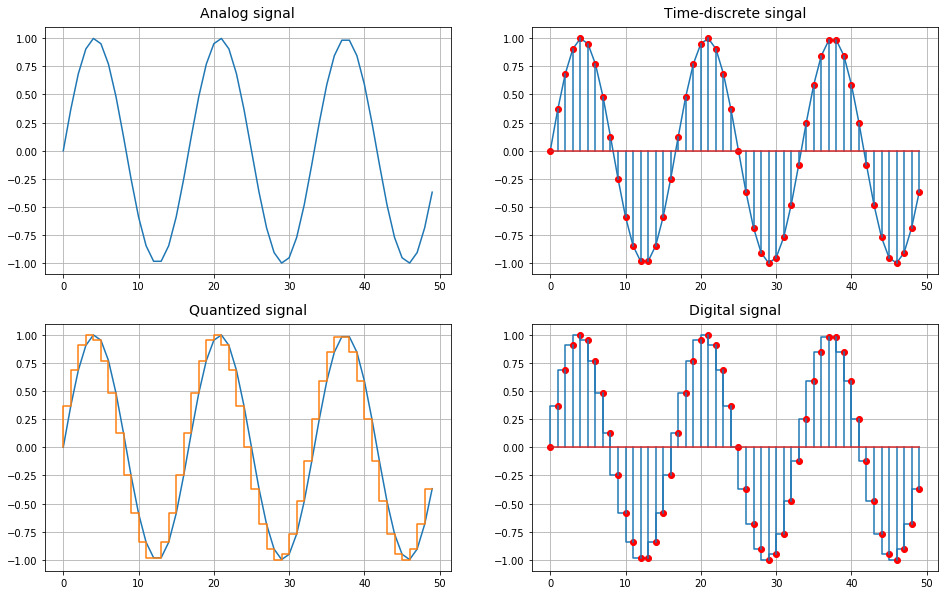

In [6]:
#generate 50 data points 
n = np.arange(50);   # output is 0, 1, 2, 3, 4,..., 49.
dt = 0.06/50
#genrate sin wave signal with data points
x = np.sin(2 * np.pi * 50 * n*dt)
# plot the figures
# set the figure size
f = plt.figure(figsize=(16,10))

# Analog signal plot
ax1 = f.add_subplot(221)
ax1.plot(x);
ax1.set_title('Analog signal', fontsize=14, pad=10)
ax1.grid(True)

# Time-discrete signal plot
ax2 = f.add_subplot(222)
ax2.plot(x)
markerline, stemlines, baseline = ax2.stem(n, x)
plt.setp(markerline, 'color','r')
ax2.set_title('Time-discrete singal', fontsize=14, pad=10)
ax2.grid(True)

# Quantized signal plot
ax3 = f.add_subplot(223)
ax3.plot(x)
ax3.plot(x, linestyle='steps')
ax3.set_title('Quantized signal', fontsize=14, pad=10)
ax3.grid(True)

# Digital signal plot
ax4 = f.add_subplot(224)
ax4.plot(x, linestyle='steps')
markerline, stemlines, baseline = ax4.stem(n, x)
plt.setp(markerline, 'color','r')
ax4.set_title('Digital signal', fontsize=14, pad=10)
ax4.grid(True)

## 2.2 Sampling Theorem (Sampling, Aliasing and Nyquest theorem)

##### Links:
- [Sampling theorem](http://www.dspguide.com/ch3/2.htm)
- [Youtube](https://www.youtube.com/watch?v=yWqrx08UeUs)

### 2.1 Sampling

<font size = '3'>**Sampling** is the reduction of a continuous-time signal to a discrete-time signal. A common example is the conversion of a sound wave (a continuous signal) to a sequence of samples (a discrete-time signal). A sample is a value or set of values at a point in time and/or space.</font>

<img src="https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/sampling.png?raw=true" width="800">

### 2.2 Aliasing

<font size = '3'>**Aliasing** is an effect that causes different signals to become indistinguishable (or aliases of one another) when sampled. It also refers to the distortion or artifact that results when the signal reconstructed from samples is different from the original continuous signal.</font>

<img src="https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/aliasing.jpeg?raw=true" width="600">

### 2.3 Nyquist theorem

<font size = '3'>**Nyquist Theorem**, also known as the sampling theorem, is a principle that engineers follow in the digitization of analog signals. For analog-to-digital conversion (ADC) to result in a faithful reproduction of the signal, slices, called samples, of the analog waveform must be taken frequently.</font>

<img src="https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/nyquest_theorem.jpeg?raw=true" width="800">

### **Recommended to for further reading*

#### Analog filters:
- [Low pass filter](http://www.learningaboutelectronics.com/Articles/Low-pass-filter.php)
- [High pass filter](https://en.wikipedia.org/wiki/High-pass_filter)
- [The Bessel, Chebyshev and butterworth filters](http://www.idc-online.com/technical_references/pdfs/electronic_engineering/Types_of_Active_Filters.pdf)

<a id='lss'></a>
<h1 style="color:black;font-size:28px;"> III.Linear Systems and Superposition</h1>


### Introductory explanation

<font size = '3'> Most DSP techniques are based on a divide-and-conquer strategy called superposition. The signal being processed is broken into simple components, each component is processed individually, and the results reunited. This approach has the tremendous power of breaking a single complicated problem into many easy ones. Superposition can only be used with linear systems, a term meaning that certain mathematical rules apply. Fortunately, most of the applications encountered in science and engineering fall into this category. This chapter presents the foundation of DSP: what it means for a system to be linear, various ways for breaking signals into simpler components, and how superposition provides a variety of signal processing techniques.</font>

### 3.1 Linear Systems

<font size = '3'>A system is called **linear** if it has two mathematical properties: **homogeneity**
 and **additivity**. If you can show that a system has both
properties, then you have proven that the system is linear. Likewise, if you can
show that a system doesn't have one or both properties, you have proven that
it isn't linear. A third property, **shift invariance**, is not a strict requirement
for linearity, but it is a mandatory property for most DSP techniques. When
you see the term linear system used in DSP, you should assume it includes shift
invariance unless you have reason to believe otherwise.</font>

<img src="https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/linear_system.jpeg?raw=true" width="700" align="left">

<font size='3'>**3.1.1 Homogenity**</font>

<font size='3'> **Homogeneity (Scaling)** means that a change in the input signal's amplitude results in a corresponding change in the output signal's amplitude. In mathematical terms, if an input signal of x[n] results in an output signal of y[n], an input of kx[n] results in an output of ky[n], for any input signal and constant, k.</font>

<img src="https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/homo.jpeg?raw=true" align='left'>

<font size='3'>**3.1.2 Additivity**</font>

<font size='3'>**Additivity** is that consider a system where an input of x1[n] produces an output of y1[n]. Further suppose that a different input, x2[n], produces another output, y2[n]. The system is said to be additive, if an input of x1[n] + x2[n] results in an output of y1[n] + y2[n], for all possible input signals. In words, signals added at the input produce signals that are added at the output.<font/>

<img src="https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/additivity.jpeg?raw=true" align='left'>

<font size='3'>**3.1.3 Shift invariance**</font>

<font size='3'>**Shift invariance** means that a shift in the input signal will result in nothing more than an identical shift in the output signal. In more formal terms, if an input signal of x[n] results in an output of y[n], an input signal of x[n + s] results in an output of y[n + s], for any input signal and any constant, s.<font/>

<img src="Images/invariance.jpeg" align='left'>

### 3.2 Superposition principle: the Foundation of DSP

<img src="https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/superposition.png?raw=true" width='800' align='left' >

<font size='4'>**Decomposition** is breaking a signal into additive components</font>

<font size='4'>**Synthesis** is breaking a signal into additive components</font>

### **Recommended for further reading*

#### Commonly used Decompositions

- Impulse Decomposition 
- Step Decomposition
- Even/Odd Decompsition
- Interlaced Decomposition
- Fourier Decomposition

#### Link:
[Common decompositions](http://www.dspguide.com/ch5/7.htm)

<a id='convolution'></a>
<h1 style="color:black;font-size:28px;"> IV. Convolution</h1>
    

<font size=3>**Convolution** is a mathematical way of combining two signals to form a third signal. It is the
single most important technique in Digital Signal Processing. Using the strategy of impulse
decomposition, systems are described by a signal called the impulse response. Convolution is
important because it relates the three signals of interest: the input signal, the output signal, and
the impulse response</font>

<img src= 'https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/convolution_3.png?raw=true' width = '600'>

### Review the sample signal 

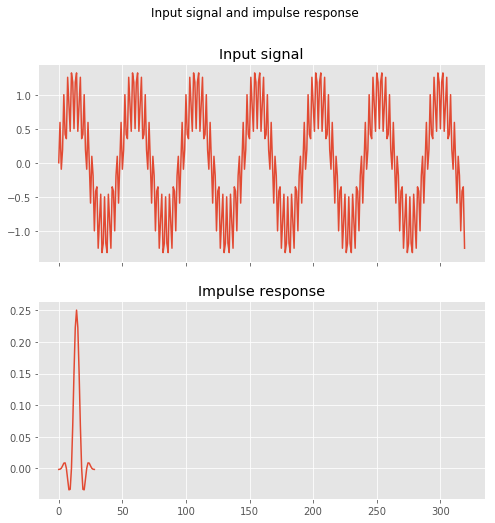

<Figure size 1080x1080 with 0 Axes>

In [43]:
import mysignals as sigs
from matplotlib import style
from scipy import signal
import math
style.use('ggplot')

f, plt_arr = plt.subplots(2,sharex=True, figsize=(8,8))

f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[0].set_title("Input signal")
plt_arr[1].plot(sigs.Impulse_response)
plt_arr[1].set_title("Impulse response")

plt.figure(figsize=(15,15))

plt.show()

### Applying convolution

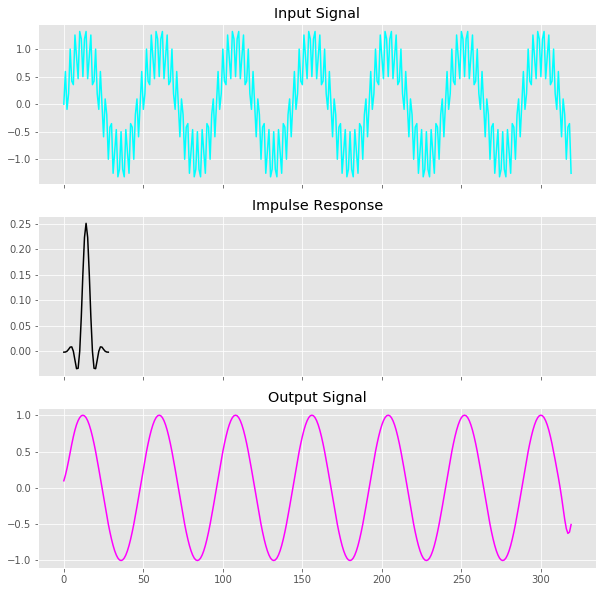

In [8]:
output_signal = signal.convolve(sigs.InputSignal_1kHz_15kHz,sigs.Impulse_response, mode='same')

style.use('ggplot')

f,plt_arr = plt.subplots(3,sharex=True, figsize = (10, 10))
#f.suptitle("Convolution", size=15)
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz, color ='cyan')
plt_arr[0].set_title("Input Signal")
plt_arr[1].plot(sigs.Impulse_response, color ='black')
plt_arr[1].set_title("Impulse Response")
plt_arr[2].plot(output_signal, color ='magenta')
plt_arr[2].set_title("Output Signal")

plt.show()

<h1 style="color:black;font-size:28px;"> 4.2 Correlation</h1>

<font size=4>**Correlation** is a mathematical operation that is very similar to convolution.
Just as with convolution, correlation uses two signals to produce a third
signal. This third signal is called the cross-correlation of the two input
signals. If a signal is correlated with itself, the resulting signal is instead
called the autocorrelation.</font>

<img src='https://www.dspguide.com/graphics/F_7_13.gif'>

## Relationship between Convolution, Cross-correlation and Autocorrelation

<img src= 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/1280px-Comparison_convolution_correlation.svg.png' width = '600'>

## Coding: Correlation

/home/e/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


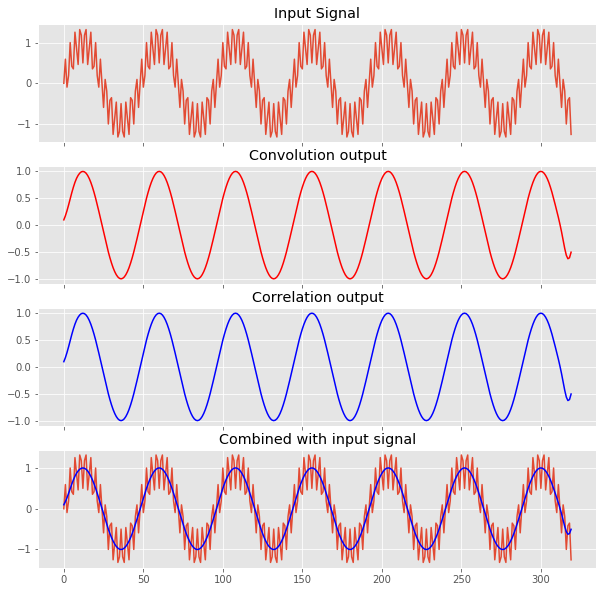

In [9]:
corr_output_signal = signal.correlate(sigs.InputSignal_1kHz_15kHz, sigs.Impulse_response,mode ='same')
conv_output_signal = signal.convolve(sigs.InputSignal_1kHz_15kHz, sigs.Impulse_response,mode ='same')

f,plt_arr = plt.subplots(4,sharex=True, figsize = (10, 10))
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[0].set_title("Input Signal")

plt_arr[1].plot(corr_output_signal, color='red')
plt_arr[1].set_title("Convolution output")
plt_arr[2].plot(conv_output_signal, color='blue')
plt_arr[2].set_title('Correlation output')
plt_arr[3].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[3].plot(conv_output_signal, color='blue')
plt_arr[3].set_title('Combined with input signal')
plt.show()

### Running sum algorithm

<font size=4>**A running sum** is the summation of a sequence of numbers which is updated each time a new number is added to the sequence, by adding the value of the new number to the previous running total. Another term for it is partial sum. The purposes of a running total are twofold.</font>

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/run_sum.png?raw=true' width=600>

## Coding: Running sum!

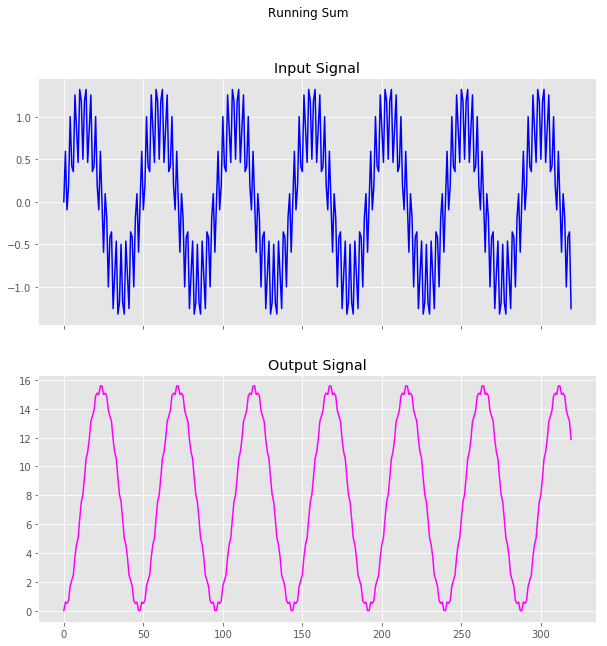

In [10]:
output_signal = np.cumsum(sigs.InputSignal_1kHz_15kHz)

#style.use('ggplot')
style.use('ggplot')

f,plt_arr = plt.subplots(2,sharex=True, figsize=(10, 10))
f.suptitle("Running Sum")

plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz,color='blue')
plt_arr[0].set_title("Input Signal")

plt_arr[1].plot(output_signal,color ='magenta')
plt_arr[1].set_title("Output Signal")

plt.show()

## Difference

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/first_diff.png?raw=true' width=600>

## Coding: Difference

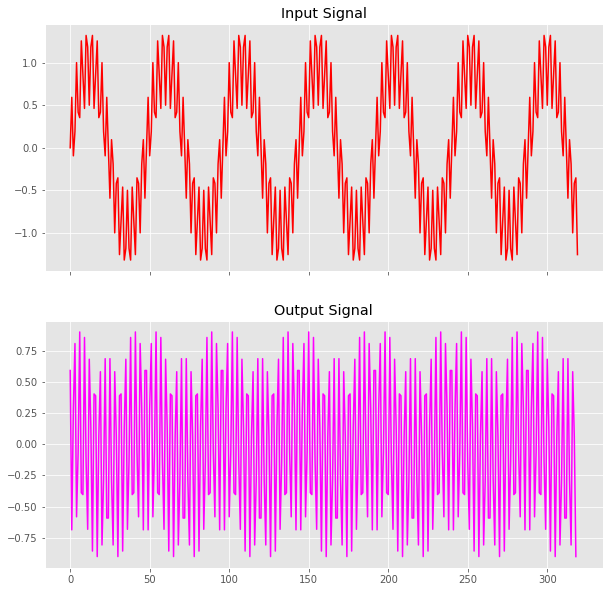

In [11]:
output_signal = np.diff(sigs.InputSignal_1kHz_15kHz)

#style.use('ggplot')
#style.use('dark_background')

f,plt_arr = plt.subplots(2,sharex=True, figsize=(10, 10))
#f.suptitle("Difference", size =15)

plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz,color='red')
plt_arr[0].set_title("Input Signal")

plt_arr[1].plot(output_signal,color ='magenta')
plt_arr[1].set_title("Output Signal")

plt.show()


<a id='ft'></a>
<h1 style="color:black;font-size:28px;"> V. Discrete Fourier Transform</h1>


## 5.1 Intorduction to Fourier Transform

<font size = 4> **Fourier analysis** is a family of mathematical techniques, all based on decomposing signals into
sinusoids. The discrete Fourier transform (DFT) is the family member used with digitized
signals. Fourier analysis divided into two part: (1) The real DFT, a version of the discrete Fourier
transform that uses real numbers to represent the input and output signals. (2) The complex DFT,
a more advanced technique that uses complex numbers.</font>

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/FT_0_1.png?raw=true'>

### Theory for Fourier Transform types

**Aperiodic-Continuous**

This includes, for example, decaying exponentials and the Gaussian curve.
These signals extend to both positive and negative infinity without repeating in
a periodic pattern. The Fourier Transform for this type of signal is simply
called the Fourier Transform.

**Periodic-Continuous**

Here the examples include: sine waves, square waves, and any waveform that
repeats itself in a regular pattern from negative to positive infinity. This
version of the Fourier transform is called the Fourier Series.

**Aperiodic-Discrete**

These signals are only defined at discrete points between positive and negative
infinity, and do not repeat themselves in a periodic fashion. This type of
Fourier transform is called the Discrete Time Fourier Transform.

**Periodic-Discrete**

These are discrete signals that repeat themselves in a periodic fashion from
negative to positive infinity. This class of Fourier Transform is sometimes
called the Discrete Fourier Series, but is most often called the Discrete
Fourier Transform.

### Main representation of Fourier Transform

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/FT_3.png?raw=true' width=800>

### Example of fouriere transform and Real and Imaganiary parts

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/FT_4.png?raw=true'>

## 5.2 DFT and IDFT calculations with a code  

### Types of DFT calculations

- [DFT equations](http://www.dspguide.com/ch8/6.htm)
- [Correlation](http://www.dspguide.com/ch7/3.htm)
- [FFT](https://www.dspguide.com/ch12/2.htm)

### Coding with DFT equations

In [12]:

def calc_dft(sig_src_arr):
    sig_dest_imx_arr = [None]*int((len(sig_src_arr)/2))
    sig_dest_rex_arr = [None]*int((len(sig_src_arr)/2))

    for j in range(int(len(sig_src_arr)/2)):
        sig_dest_rex_arr[j] =0
        sig_dest_imx_arr[j] =0

    for k in range(int(len(sig_src_arr)/2)):
        for i in range(len(sig_src_arr)):
            sig_dest_rex_arr[k] = sig_dest_rex_arr[k] + sig_src_arr[i]*math.cos(2*math.pi*k*i/len(sig_src_arr))
            sig_dest_imx_arr[k] = sig_dest_imx_arr[k] - sig_src_arr[i]*math.sin(2*math.pi*k*i/len(sig_src_arr))

    style.use('ggplot')
    f,plt_arr = plt.subplots(3, sharex=True, figsize=(10, 10))
    f.suptitle("Discrete Fourier Transform (DFT)")

    plt_arr[0].plot(sig_src_arr, color='red')
    plt_arr[0].set_title("Input Signal",color='red')
    
    plt_arr[1].plot(sig_dest_rex_arr, color='green')
    plt_arr[1].set_title("Frequency Domain(Real part)",color='red')

    plt_arr[2].plot(sig_dest_imx_arr, color='blue')
    plt_arr[2].set_title("Frequency Domain(Imaginary part)",color='red')

    plt.show()

In [ ]:
calc_dft(sigs.InputSignal_1kHz_15kHz)

## Inverse Discrete Fourier Transform

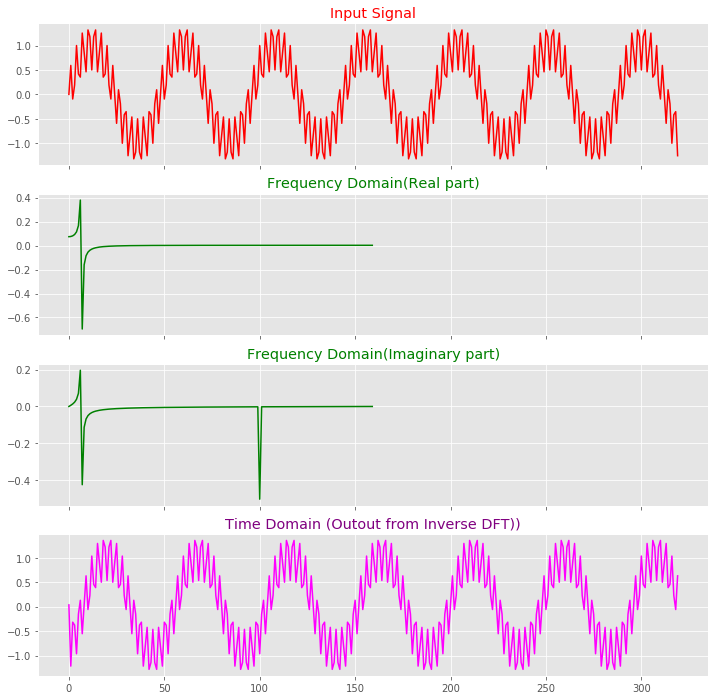

In [13]:
import mysignals as sigs
from matplotlib import pyplot as plt
from matplotlib import style
import math

sig_dest_imx_arr = []
sig_dest_rex_arr = []
sig_dest_mag_arr = []
def calc_dft(sig_src_arr):
    
    global sig_dest_imx_arr
    global sig_dest_rex_arr
    global sig_dest_mag_arr

    sig_dest_imx_arr = [None]*int((len(sig_src_arr)/2))
    sig_dest_rex_arr = [None]*int((len(sig_src_arr)/2))
    sig_dest_mag_arr = [None]*int((len(sig_src_arr)/2))
    
    for j in range(int(len(sig_src_arr)/2)):
        sig_dest_rex_arr[j] =0
        sig_dest_imx_arr[j] =0

    for k in range(int(len(sig_src_arr)/2)):
        for i in range(len(sig_src_arr)):
            sig_dest_rex_arr[k] = sig_dest_rex_arr[k] + sig_src_arr[i]*math.cos(2*math.pi*k*i/len(sig_src_arr))
            sig_dest_imx_arr[k] = sig_dest_imx_arr[k] - sig_src_arr[i]*math.sin(2*math.pi*k*i/len(sig_src_arr))

    for x in range(int(len(sig_src_arr)/2)):
        sig_dest_mag_arr[x] = math.sqrt(math.pow(sig_dest_rex_arr[x],2)+math.pow(sig_dest_imx_arr[x],2))
        
    
def plot_signals(sig_src_arr):
    #style.use('ggplot')
    #style.use('dark_background')
    f,plt_arr = plt.subplots(4, sharex=True, figsize=(12,12))
    #f.suptitle("Discrete Fourier Transform (DFT)")

    plt_arr[0].plot(sig_src_arr, color='red')
    plt_arr[0].set_title("Input Signal",color='red')
    
    plt_arr[1].plot(sig_dest_rex_arr, color='green')
    plt_arr[1].set_title("Frequency Domain(Real part)",color='green')

    plt_arr[2].plot(sig_dest_imx_arr, color='green')
    plt_arr[2].set_title("Frequency Domain(Imaginary part)",color='green')

   # plt_arr[3].plot(sig_dest_mag_arr, color='magenta')
   # plt_arr[3].set_title("Frequency Domain (Magnitude))",color='yellow')

    plt_arr[3].plot(sig_dest_idft_arr, color='magenta')
    plt_arr[3].set_title("Time Domain (Outout from Inverse DFT))",color='purple')

    
    plt.show()



sig_dest_idft_arr =[]  

def calc_idft(sig_src_rex_arr, sig_src_imx_arr):
     global sig_dest_idft_arr
     sig_dest_idft_arr = [None]*(len(sig_src_rex_arr)*2)

     for j in range(len(sig_src_rex_arr)*2):
         sig_dest_idft_arr[j] =0


     for x in range(len(sig_src_rex_arr)):
        sig_src_rex_arr[x] =  sig_src_rex_arr[x]/len(sig_src_rex_arr)
        sig_src_imx_arr[x] =  sig_src_imx_arr[x]/len(sig_src_rex_arr)


     for k in range(len(sig_src_rex_arr)):
        for i in range(len(sig_src_rex_arr)*2):
            sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + sig_src_rex_arr[k] *math.cos(2*math.pi*k*i/(len(sig_src_rex_arr)*2))
            sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + sig_src_imx_arr[k] *math.sin(2*math.pi*k*i/(len(sig_src_rex_arr)*2))
            


calc_dft(sigs.InputSignal_1kHz_15kHz)
calc_idft(sig_dest_rex_arr,sig_dest_imx_arr)
plot_signals(sigs.InputSignal_1kHz_15kHz)
     





    
    

## 5.3 Applications of DFT

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/dft_5.png?raw=true'>

#### 5.3.1 Spectral analysis

It is very common for information to be encoded in the sinusoids that form
a signal. This is true of naturally occurring signals, as well as those that
have been created by humans. Many things oscillate in our universe. For
example, speech is a result of vibration of the human vocal cords; stars
and planets change their brightness as they rotate on their axes and revolve
around each other; ship's propellers generate periodic displacement of the
water, and so on. The shape of the time domain waveform is not important
in these signals; the key information is in the *frequency*, *phase* and
*amplitude* of the component sinusoids. The DFT is used to extract this
information.

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/FT_6.png?raw=true'>

### 5.3.2 Frequency response

Systems are analyzed in the time domain by using convolution. A similar
analysis can be done in the frequency domain. Using the Fourier transform,
every input signal can be represented as a group of cosine waves, each with a
specified amplitude and phase shift. Likewise, the DFT can be used to
represent every output signal in a similar form. This means that any linear
system can be completely described by how it changes the amplitude and phase
of cosine waves passing through it. This information is called the system's
**frequency response**. Since both the impulse response and the frequency
response contain complete information about the system, there must be a one-
to-one correspondence between the two. Given one, you can calculate the
other. The relationship between the impulse response and the frequency
response is one of the foundations of signal processing:

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/FT_7.png?raw=true'>

<a id='complex'></a>
<h1 style="color:black;font-size:28px;"> VI. Complex Numbers and Complex Fourier Transform</h1>

## 6.1 Complex Numbers

A **complex number** is a number that can be expressed in the form a + bi, where a and b are real numbers, and i is a solution of the equation x2 = −1. Because no real number satisfies this equation, i is called an imaginary number.

<img src='https://www.onlinemathlearning.com/image-files/complex-number.png' align='left'>

- [Complex Numbers](https://en.wikipedia.org/wiki/Complex_number)

## 6.2 Complex Fourier Transform

<font size=4>Although **complex numbers** are fundamentally disconnected from our reality, they can be used to
solve science and engineering problems in two ways. **First**, the parameters from a real world
problem can be substituted into a complex form. The **second**
method is much more elegant and powerful, a way of making the complex numbers
mathematically equivalent to the physical problem. This approach leads to the complex Fourier
transform, a more sophisticated version of the real Fourier transform.
The complex Fourier transform is important in itself, but also as a stepping stone to more
powerful complex techniques, such as the **Laplace** and **z-transforms**. These complex transforms
are the foundation of theoretical DSP.</font>

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/Complex_vs_real_DFT_1.png?raw=true'>

<a id='fft'></a>
<h1 style="color:black;font-size:28px;"> VII. Fast Fourier Transform</h1>

<font size=4>A **Fast Fourier Transform (FFT)** is an algorithm that computes *the discrete Fourier transform (DFT)* of a sequence, or its *inverse (IDFT)*. Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa.</font>

<img src='https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/FFT_flowchart.png?raw=true'>

## Coding: FFT and IFFT

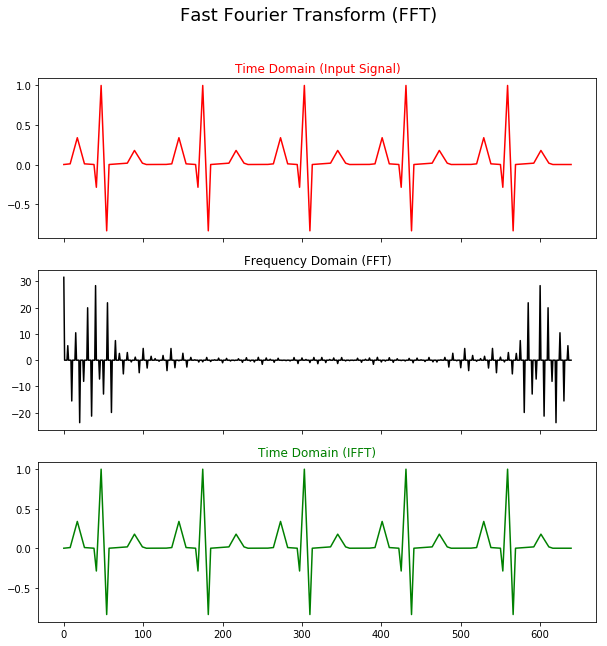

In [9]:
import fft as sigs
from matplotlib import pyplot as plt
from scipy.fftpack import fft,ifft
import numpy as np
from matplotlib import style

freq_domain_signal = fft(sigs.ecg_signal)
time_domain_signal = ifft(freq_domain_signal)
magnitude = np.abs(freq_domain_signal)

#style.use('dark_background')

f,plt_arr= plt.subplots(3,sharex=True, figsize = (10, 10))
f.suptitle("Fast Fourier Transform (FFT)", size=18)

plt_arr[0].plot(sigs.ecg_signal,color='red')
plt_arr[0].set_title("Time Domain (Input Signal)", color ='red')

plt_arr[1].plot(freq_domain_signal,color='black')
plt_arr[1].set_title("Frequency Domain (FFT)", color ='black')

#plt_arr[2].plot(magnitude,color='cyan')
#plt_arr[2].set_title("Magnitude", color ='cyan')

plt_arr[2].plot(time_domain_signal,color='green')
plt_arr[2].set_title("Time Domain (IFFT)", color ='green')

plt.show()



<a id='dfd'></a>
<h1 style="color:black;font-size:28px;"> VIII. Digital Filter Design</h1>

## 7.1 Intro to Digital Filters

<font size='4'>**Digital filters are used for two general purposes:** (1) **separation** of signals that have been
combined, and (2) **restoration** of signals that have been distorted in some way. Analog
(electronic) filters can be used for these same tasks; however, digital filters can achieve far
superior results. The most popular digital filters are described and compared in the next 
chapters. This introductory chapter describes the parameters you want to look for when learning
about each of these filters.</font>

<img src="https://github.com/EldorIbragimov/DSP_in_python/blob/master/Images/DF_method_chart.jpg?raw=true">

## 7.2 Designing Finite Impulse Response (FIR) filters 

### Moving average filter with coding

In [15]:
# create function for moving average filter
def moving_average_filter(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


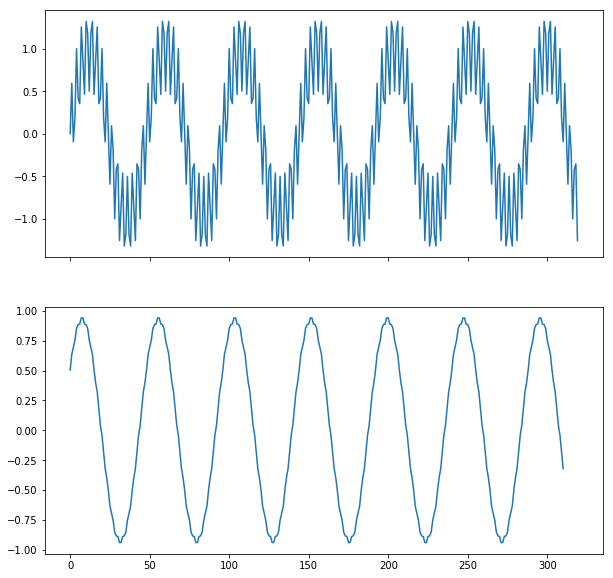

In [23]:
signal = sigs.InputSignal_1kHz_15kHz

# apply moving average filter
filtered_signal = moving_average_filter(signal, 10)

# plot the both filtered and real signal
f,plt_arr= plt.subplots(2,sharex=True, figsize = (10, 10))

plt_arr[0].plot(signal)
plt_arr[1].plot(filtered_signal)


### Lowpass, Highpass and Bandpass filters

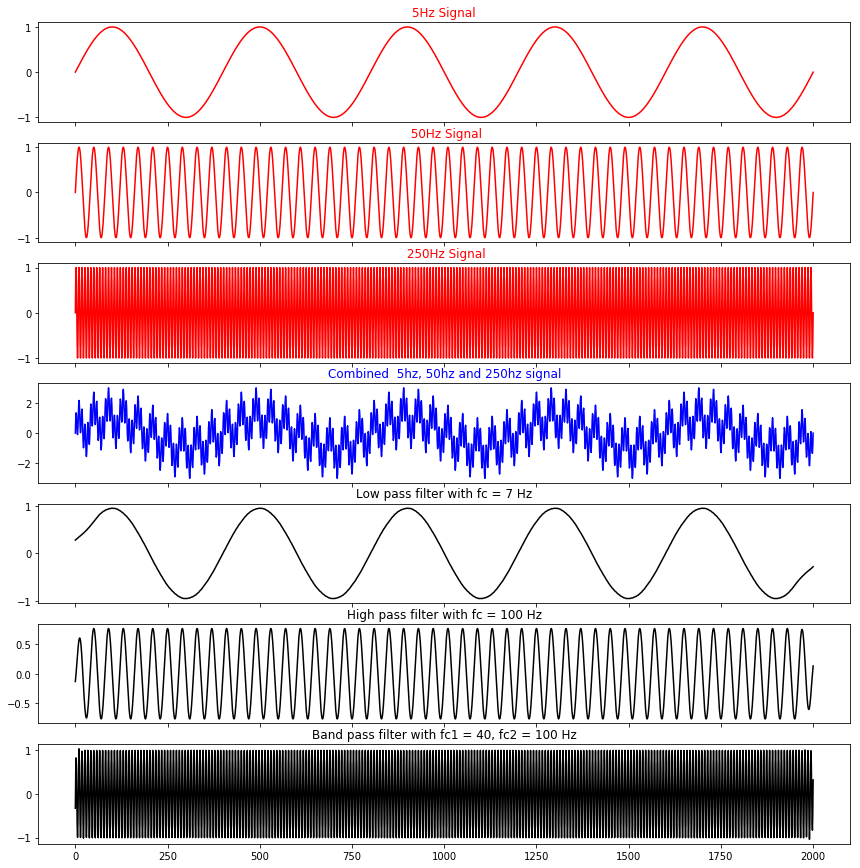

In [40]:
import scipy.signal as signal
t = np.linspace(0,1.0,2001)

sig_5hz = np.sin(2*np.pi*5*t)

sig_50hz = np.sin(2*np.pi*50*t)

sig_250hz = np.sin(2*np.pi*250*t)

sig_5hz__50hz_250hz = sig_5hz + sig_50hz + sig_250hz


# number of taps for the filters
numtaps = 101

# low pass cutoffs

lpf_cutoff = 7
hpf_cutoff = 100

bp_cutoff = 40
bp_cutoff2 = 100

# Lowpass filter
# generate impulse response
lowpass_coef = signal.firwin(numtaps, lpf_cutoff, nyq = 1000)
lpf =  signal.convolve(sig_5hz__50hz_250hz, lowpass_coef, mode = 'same')

# High pass filter
highpass_coef = signal.firwin(numtaps, hpf_cutoff, pass_zero = False, nyq=1000)
hpf = signal.convolve(sig_5hz__50hz_250hz, highpass_coef, mode = 'same')

# Band pass filter
bp_coef = signal.firwin(numtaps, [bp_cutoff, bp_cutoff2], pass_zero = False, nyq=1000)
bpf = signal.convolve(sig_5hz__50hz_250hz, bp_coef, mode = 'same')


f, plt_arr =plt.subplots(7,sharex=True, figsize =(12, 12))
#f.suptitle('Filtfilt Filter')
f.tight_layout()
plt_arr[0].plot(sig_5hz,color='red')
plt_arr[0].set_title("5Hz Signal", color ='red')

plt_arr[1].plot(sig_50hz,color='red')
plt_arr[1].set_title(" 50Hz Signal", color ='red')

plt_arr[2].plot(sig_250hz,color='red')
plt_arr[2].set_title(" 250Hz Signal", color ='red')

plt_arr[3].plot(sig_5hz__50hz_250hz,color='blue')
plt_arr[3].set_title("Combined  5hz, 50hz and 250hz signal", color ='blue')

plt_arr[4].plot(lpf,color='black')
plt_arr[4].set_title("Low pass filter with fc = 7 Hz")

plt_arr[5].plot(bpf,color='black')
plt_arr[5].set_title("High pass filter with fc = 100 Hz")

plt_arr[6].plot(hpf,color='black')
plt_arr[6].set_title("Band pass filter with fc1 = 40, fc2 = 100 Hz")


plt.show()

## 7.2 Designing Infinite Impulse Response (FIR) filters 

<a id='wf'></a>
<h1 style="color:black;font-size:28px;"> X. Filters: Windowed, Custom and Match; FFT Convolution</h1>

<a id='lti'></a>
<h1 style="color:black;font-size:28px;"> XII. Linear time Invariant Systems</h1>

<a id='interp'></a>
<h1 style="color:black;font-size:28px;"> XIII. Interpolation</h1>

<a id='wg'></a>
<h1 style="color:black;font-size:28px;"> XIV. Waveform Generation</h1>